<a href="https://colab.research.google.com/github/rafaelreisramos/oracle-one/blob/main/challenge-telecom-x/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X, análise de evasão de clientes.

A Telecom X é uma empresa de telecomunicações, e você foi contratado como assistente de análise de dados para fazer parte da equipe de Data Science. A equipe está com um novo projeto denominado Churn de Clientes.

A empresa vem sofrendo alto índice de evasão de clientes, porém, eles não conseguem descobrir o porquê disso estar acontecendo. E é aí que você entra como assistente de análise de dados. Você ficará responsável por uma das partes mais importantes da análise de dados. Você ficará responsável por buscar, tratar e realizar uma análise exploratoria dos dados da empresa. Ou seja, você colocará em prática todos os seus conhecimentos sobre o processo de ETL.

Com os dados tratados e limpos, seus colegas mais experientes serão capazes de realizar uma análise mais profunda, e assim, criar modelos preditivos para que essa taxa de evasão diminua.

A parte mais importante desse desafio é a extração dos dados. Os dados da empresa estão em uma API que está armazenada dentro de um repositório no GitHub. O primeiro passo que você tem que fazer nesse desafio é descobrir a melhor maneira de fazer essa extração. Com a extração feita, você colocará em prática a parte T, ou seja, a parte de transformação. Você tem que transformar esses dados para em seguida poder analisar e gerar alguns insights dele.

Como parte final, você deverá gerar um relatório explicando detalhadamente todo o processo de ETL feito. Ou seja, você tem que começar com uma introdução, falando o objetivo da sua análise, explicando o problema da evasão de clientes, descrever o processo de importar, limpar e tratar os dados, explicar a análise exploratória, incluindo gráficos e visualização para identificar padrões e, através disso tudo, criar uma conclusão. Ou seja, resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.

Também recomendamos que você ofereça sugestões baseadas nas análises para, assim, ajudar ainda mais a equipe de data science. Com esse desafio, você colocará em prática todo o seu conhecimento em ETL, análise exploratória, também conhecido na área de data science como EDA. Tudo isso utilizando Python e as suas bibliotecas nativas como Pandas, Seaborn, Matplotlib, entre outras.

Com os dados devidamente tratados e analisados, é possível identificar padrões dos clientes e, assim, evitar o churn (evasão) de clientes.

### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `ChargesMonthly`: total de todos os serviços do cliente por mês
* `ChargesTotal`: total gasto pelo cliente

##📌 Extracão

In [480]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/challenge-telecom-x/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Inspecionando um registro podemos entrender melhor a estrutura do arquivo `.j̀son`

```
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}
```

Os campos `customer`, `phone`, `internet` e `account` estão aninhados e tem de ser normalizados.

Como são múltiplas colunas, ao invés de normalizar cada coluna do dataframe e criar um novo, vamos importar o arquivo `.j̀son` e passá-lo ao `json_normalize()` diretamente.

In [481]:
import requests

json_data = requests.get(url).json()
df = pd.json_normalize(json_data, sep='_')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


As colunas foram prefixadas com o nome das chaves do arquivo `.json`.

Vamos renomeá-las.

In [482]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [483]:
new_columns_names = ['customerID', 'Churn', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Paperless_Billing', 'Payment_Method',
       'Charges_Monthly', 'Charges_Total']
df = df.set_axis(new_columns_names, axis='columns')
df.head()

,customerID,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##🔧 Transformação

Vamos verificar se os dados são únicos.

In [484]:
df.shape

(7267, 21)

In [485]:
len(pd.unique(df['customerID']))

7267

Como aplicamos `unique` à coluna `customerID` e obtivemos o mesmo tamanho do dataframe podemos concluir que os dados são únicos e não repetidos.

A coluna `customerID` não acrescenta nenhuma informação para análise. Vamos removê-la do dataframe.

In [486]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Vamos analisar os dados para verificar se temos dados *nulos* e também verificar seus *tipos*.

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7267 non-null   object 
 1   Gender             7267 non-null   object 
 2   Senior_Citizen     7267 non-null   int64  
 3   Partner            7267 non-null   object 
 4   Dependents         7267 non-null   object 
 5   Tenure             7267 non-null   int64  
 6   Phone_Service      7267 non-null   object 
 7   Multiple_Lines     7267 non-null   object 
 8   Internet_Service   7267 non-null   object 
 9   Online_Security    7267 non-null   object 
 10  Online_Backup      7267 non-null   object 
 11  Device_Protection  7267 non-null   object 
 12  Tech_Support       7267 non-null   object 
 13  Streaming_TV       7267 non-null   object 
 14  Streaming_Movies   7267 non-null   object 
 15  Contract           7267 non-null   object 
 16  Paperless_Billing  7267 

A coluna `ChargesTotal` é obviamente numérica. Vamos então convertê-la para `float64`. Vamos usar `pd.to_numeric()` para lidar com eventuais erros de valores inválidos (o que não acontece com `astype`).

In [488]:
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

Agora fazer uma varredura por todas as colunas tipo `object` para converter os dados para `str` e remover espaços em branco. Caso seja um string vazio `''`, substituir por `None`

In [489]:
colunas_object = df.select_dtypes(include='object').columns
for coluna in colunas_object:
    df[coluna] = df[coluna].str.strip().apply(lambda x: x if x != '' else None)

Vamos verificar se existem valores nulos.

In [490]:
df.isnull().any()

,0
Churn,True
Gender,False
Senior_Citizen,False
Partner,False
Dependents,False
Tenure,False
Phone_Service,False
Multiple_Lines,False
Internet_Service,False
Online_Security,False


Observamos que as colunas `Churn` e `ChargesTotal` têm valores nulos. Vamos analisar os registros para verificarmos qual a ação a realizar.

In [491]:
df[df['Charges_Total'].isnull()]

,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
975,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Aqui observamos que as colunas com `ChargesTotal` com valores inválidos/nulos `NaN` coincidem com `Tenure=0`. Parece indicar que estes clientes não tem uma cobrança total por nem terem completado um período no serviço. Vamos confirmar se existem outros registros com `Tenure=0`.

In [492]:
df[df['Tenure']==0].equals(df[df['Charges_Total'].isnull()])

True

Os registros são exatamente os mesmos. Como não foi completado um período vamos eliminar estes registros do nosso dataframe.

In [493]:
df.drop(df[df['Tenure']==0].index, axis=0, inplace=True)

Para a análise de `Churn`; se o campo que o identifica não está preenchido, o registro deve ser eliminado. Não temos informação suficiente em outros registros do dataframe que possam levar a inferir um valor de `Churn`.

In [494]:
df.dropna(inplace=True)
df.isnull().any()

,0
Churn,False
Gender,False
Senior_Citizen,False
Partner,False
Dependents,False
Tenure,False
Phone_Service,False
Multiple_Lines,False
Internet_Service,False
Online_Security,False


Agora nosso dataframe não possui mais valores nulos.

Vamos analisar o dataframe coluna a coluna para identificar o que pode ser melhorado antes do processo de análise.

In [495]:
colunas_object = df.select_dtypes(include='object').columns
for coluna in colunas_object:
    print(df[coluna].value_counts())
    print('')

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Phone_Service
Yes    6352
No      680
Name: count, dtype: int64

Multiple_Lines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Internet_Service
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Online_Security
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Online_Backup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

Device_Protection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

Tech_Support
No                     3472
Yes                    2040
No internet service   

As colunas `Churn`, `Partner`, `Dependents`, `Phone_Service`, `Paperless_Billing` tem valores do tipo `Yes` e `No`. Essa colunas podem ser identificadas como `booleanas`, No nosso caso, no entanto, vamos mantê-las como `Yes` e `No`.

In [496]:
def transform_columns(df, columns):
    mapping = {'Yes': True, 'No': False}
    for column in columns:
        # df[column] = df[column].map(mapping)
        df[column] = df[column].map(lambda x: mapping.get(x, x))

    return df

df = transform_columns(df, ['Churn', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing'])

Da mesma forma a coluna `SeniorCitizen` parece indicar valores `Yes` e `No` através dos números `1` e `0`, respectivamente. Vamos verificar se não existe nenhum número diferente de `1` e `0` e, da mesma forma que nas colunas anteriores, alterar o tipo para `Yes` e `No`.

---



In [497]:
df['Senior_Citizen'].value_counts()

,count
Senior_Citizen,
0,5890
1,1142


In [498]:
# df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['Senior_Citizen'] = df['Senior_Citizen'].map({1: True, 0: False})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7032 non-null   bool   
 1   Gender             7032 non-null   object 
 2   Senior_Citizen     7032 non-null   bool   
 3   Partner            7032 non-null   bool   
 4   Dependents         7032 non-null   bool   
 5   Tenure             7032 non-null   int64  
 6   Phone_Service      7032 non-null   bool   
 7   Multiple_Lines     7032 non-null   object 
 8   Internet_Service   7032 non-null   object 
 9   Online_Security    7032 non-null   object 
 10  Online_Backup      7032 non-null   object 
 11  Device_Protection  7032 non-null   object 
 12  Tech_Support       7032 non-null   object 
 13  Streaming_TV       7032 non-null   object 
 14  Streaming_Movies   7032 non-null   object 
 15  Contract           7032 non-null   object 
 16  Paperless_Billing  7032 non-n

Agora nosso dataframe está adequado para iniciarmos algumas análises.

In [499]:
df.to_csv('telecom_x.csv', index=False)

##📊 Carga e análise

Vamos iniciar com uma análise descritiva das variáveis numéricas.

In [500]:
df.describe()

,Tenure,Charges_Monthly,Charges_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observamos um grande desvio em relação aos valores médios.

Vamos analisar os dados de `Churn` e depois voltamos à análise descritiva.

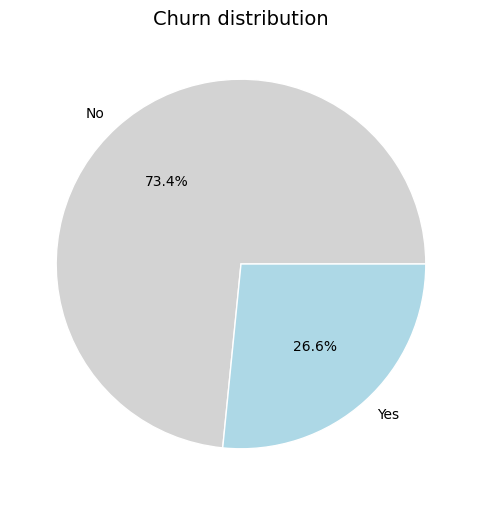

In [501]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(df['Churn'].value_counts(), colors=['lightgray', 'lightblue'],
       labels=['No', 'Yes'], autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Churn distribution', fontsize=14)

plt.show()

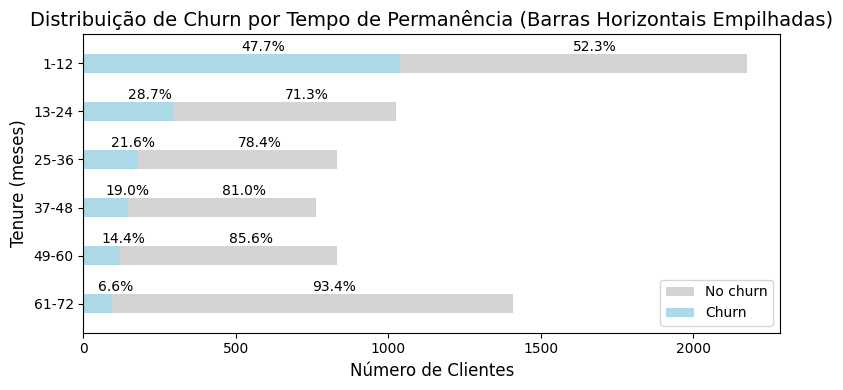

In [502]:
# Agrupar os dados por tempo de permanência (Tenure) e churn
churn_counts = df.groupby(['Tenure', 'Churn']).size().unstack(fill_value=0)

# Criar intervalos de 12 em 12 meses até 72 meses
tenure_intervals = pd.cut(churn_counts.index, bins=range(0, 73, 12), right=True)

# Somar os churns dentro de cada intervalo de tempo
churn_by_interval = churn_counts.groupby(tenure_intervals, observed=False).sum()

# Calcular totais e percentuais
totals = churn_by_interval.sum(axis=1)
percent_no = (churn_by_interval[False] / totals * 100).round(1)
percent_yes = (churn_by_interval[True] / totals * 100).round(1)

# Inverter ordem para que 1-12 fique no topo (sem inverter eixo)
churn_by_interval = churn_by_interval.iloc[::-1]
percent_no = percent_no[::-1]
percent_yes = percent_yes[::-1]

# Preparar dados para o gráfico
n_bars = len(churn_by_interval)
interval_positions = range(n_bars)
bar_height = 0.4
offset = bar_height * 0  # deslocamento vertical proporcional

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Barras horizontais empilhadas
bars_no = ax.barh(
    interval_positions,
    churn_by_interval[False],
    left=churn_by_interval[True],
    height=bar_height,
    label='No churn',
    color='lightgray'
)

bars_yes = ax.barh(
    interval_positions,
    churn_by_interval[True],
    height=bar_height,
    label='Churn',
    color='lightblue'
)

# Adicionar percentuais acima de cada segmento da barra
for bar_no, bar_yes, p_no, p_yes in zip(bars_no, bars_yes, percent_no.values, percent_yes.values):
    # "No"
    ax.text(
        x=bar_no.get_x() + bar_no.get_width() / 2,
        y=bar_no.get_y() + bar_no.get_height() + offset,
        s=f"{p_no}%",
        ha='left',
        va='bottom',
        #fontsize=10
    )
    # "Yes"
    ax.text(
        x=bar_yes.get_x() + bar_yes.get_width() / 2,
        y=bar_yes.get_y() + bar_yes.get_height() + offset,
        s=f"{p_yes}%",
        ha='left',
        va='bottom',
        #fontsize=10
    )

# Personalizar o gráfico
ax.set_ylabel('Tenure (meses)', fontsize=12)
ax.set_xlabel('Número de Clientes', fontsize=12)
ax.set_title('Distribuição de Churn por Tempo de Permanência (Barras Horizontais Empilhadas)', fontsize=14)

ytick_labels = [f'{int(interval.left)+1}-{int(interval.right)}' for interval in churn_by_interval.index]
ax.set_yticks(interval_positions)
ax.set_yticklabels(ytick_labels)

# Definir limites do eixo Y com padding de 1.5 × altura da barra
padding = bar_height * 1.5
ax.set_ylim(-padding, n_bars - 1 + padding)

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Agora vamos analisar a distribuição do `Churn` em função de diferentes variáveis.

In [518]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Define the formatter function
def format_func(value, tick_number):
    return f'{int(value / 1000)}k'

def generate_grouped_data(variables, drop=''):
    """Cria a lista de DataFrames com a contagem cruzada entre variável e Churn."""
    return [
#        pd.crosstab(df[var], df['Churn']).drop(drop, errors='ignore')
        pd.crosstab(df[var], df['Churn']).reindex(columns=[False, True], fill_value=0).drop(drop, errors='ignore')

        for var in variables
    ]

def calculate_centered_y_positions(n, max_categories):
    """Calcula posições centralizadas para barras horizontais empilhadas."""
    center = (max_categories - 1) / 2
    start = center - (n - 1) / 2
    return [start + i for i in range(n)]

def plot_stacked_bar_horizontal(ax, grouped, y_pos, variable_name, bar_height):
    """Plota barras horizontais empilhadas e escreve percentuais ao lado, centralizados verticalmente."""
    for i, category in enumerate(grouped.index):
        # Use .get() to safely access columns, providing a default of 0 if the column is missing
        no_val = grouped.loc[category].get(False, 0)
        yes_val = grouped.loc[category].get(True, 0)
        total = no_val + yes_val
        y = y_pos[i]

        # Barras empilhadas horizontais
        ax.barh(y, no_val, left=yes_val, height=bar_height, label='No churn' if i == 0 else "", color='lightgray')
        ax.barh(y, yes_val, height=bar_height, label='Churn' if i == 0 else "", color='lightblue')

        # Anotações ao lado da barra
        if no_val > 0:
            percent_no = round((no_val / total) * 100)
            x_center_no = yes_val + no_val
            ax.text(x_center_no, y + bar_height / 2 + 0.02, f'{percent_no}%', va='bottom', ha='left', fontsize=8)

        if yes_val > 0:
            percent_yes = round((yes_val / total) * 100)
            x_center_yes = yes_val
            ax.text(x_center_yes, y + bar_height / 2 + 0.02, f'{percent_yes}%', va='bottom', ha='left', fontsize=8)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(grouped.index.map(lambda x: {True: 'Yes', False: 'No'}.get(x, x)))
    ax.set_title(variable_name.replace('_', ' '), fontsize=12, loc='left')
    ax.set_xlabel('Customers', fontsize=10)

def subplots_horizontal(dfs, skip=[], bar_height=0.6):
    NUM_COLUMNS = 2
    num_lines = (len(dfs) + NUM_COLUMNS - 1) // NUM_COLUMNS

    FIG_WIDTH = 8
    fig_height = 3 * num_lines

    fig, axs = plt.subplots(num_lines, NUM_COLUMNS, figsize=(FIG_WIDTH, fig_height))
    axs = axs.flatten()
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    variables = [df.index.name for df in dfs]

    max_categories = max(len(grouped) for grouped in dfs)
    y_pos_dict = {
        len(grouped): calculate_centered_y_positions(len(grouped), max_categories)
        for grouped in dfs
    }

    # Calculate max_width_global safely
    max_widths_per_group = []
    for grouped in dfs:
        # Calculate the sum for each row
        row_sums = grouped[False] + grouped[True]
        # Check if row_sums is not empty before calling max()
        if not row_sums.empty:
            max_widths_per_group.append(max(row_sums))
        else:
            # If row_sums is empty, add 0 as the max width for this group
            max_widths_per_group.append(0)

    # Calculate the global max width, ensuring max_widths_per_group is not empty
    max_width_global = max(max_widths_per_group) if max_widths_per_group else 0
    adjusted_xmax = max_width_global * 1.15


    # Limites verticais uniformes baseados no maior número de categorias
    uniform_y_pos = calculate_centered_y_positions(max_categories, max_categories)
    y_min = uniform_y_pos[0] - 1.5 * bar_height
    y_max = uniform_y_pos[-1] + 1.5 * bar_height

    index = 0
    for i, ax in enumerate(axs):
        if i in skip:
            ax.axis('off')
            continue

        grouped = dfs[index]
        y_pos = y_pos_dict[len(grouped)]
        plot_stacked_bar_horizontal(ax, grouped, y_pos, variables[index], bar_height)

        ax.set_xlim(0, adjusted_xmax)
        ax.set_ylim(y_min, y_max)

        # Grade tracejada no eixo X (horizontal)
        ax.xaxis.grid(True, linestyle='--', color='lightgray', linewidth=0.7)
        # Apply the formatter to the x-axis
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

        index += 1

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

    return fig, axs


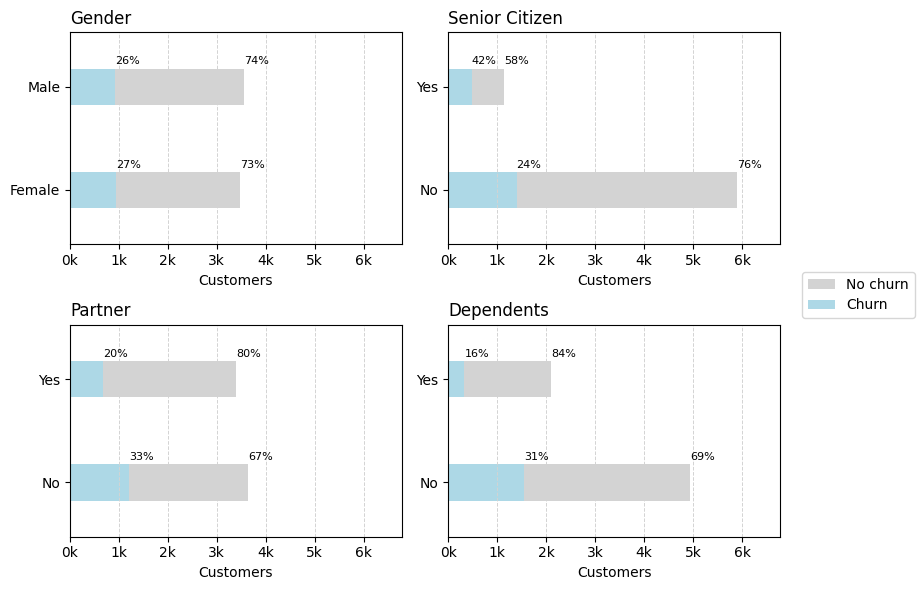

In [519]:
dfs = generate_grouped_data(['Gender', 'Senior_Citizen', 'Partner', 'Dependents'])
fig, ax = subplots_horizontal(dfs, bar_height=0.35)
plt.show()

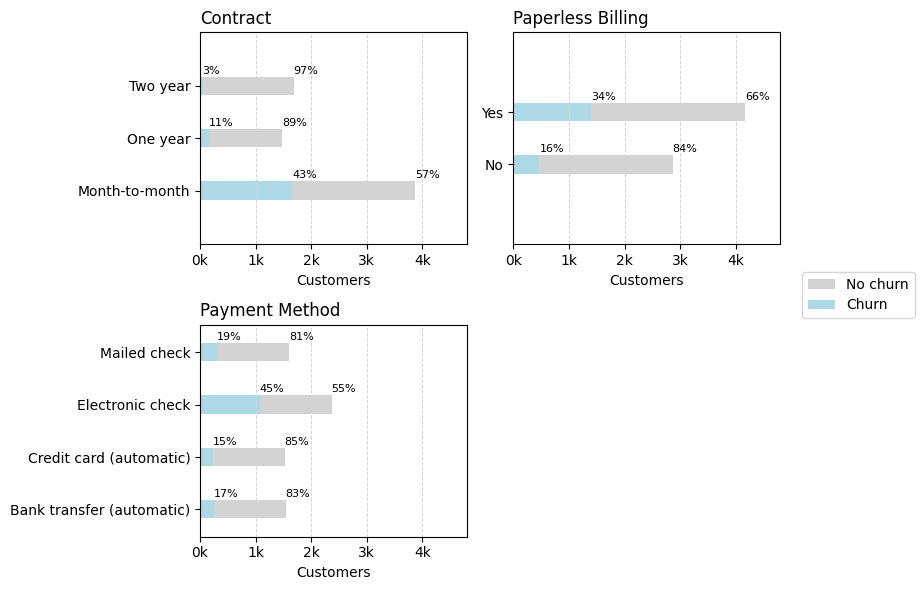

In [513]:
dfs = generate_grouped_data(['Contract', 'Paperless_Billing', 'Payment_Method'])
fig, ax = subplots_horizontal(dfs, skip=[3], bar_height=0.35)
plt.show()

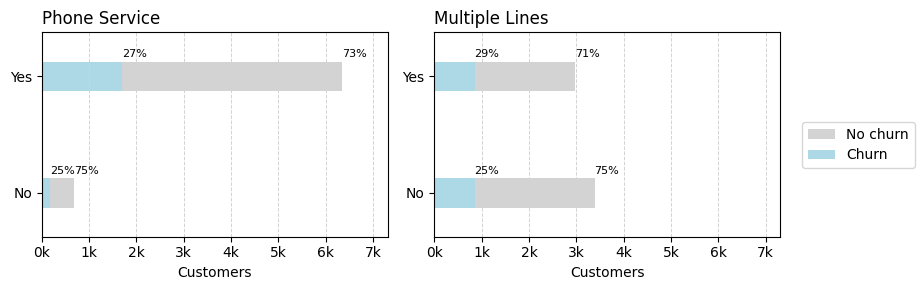

In [514]:
dfs = generate_grouped_data(['Phone_Service', 'Multiple_Lines'], drop='No phone service')
fig, ax = subplots_horizontal(dfs, bar_height=0.25)
plt.show()

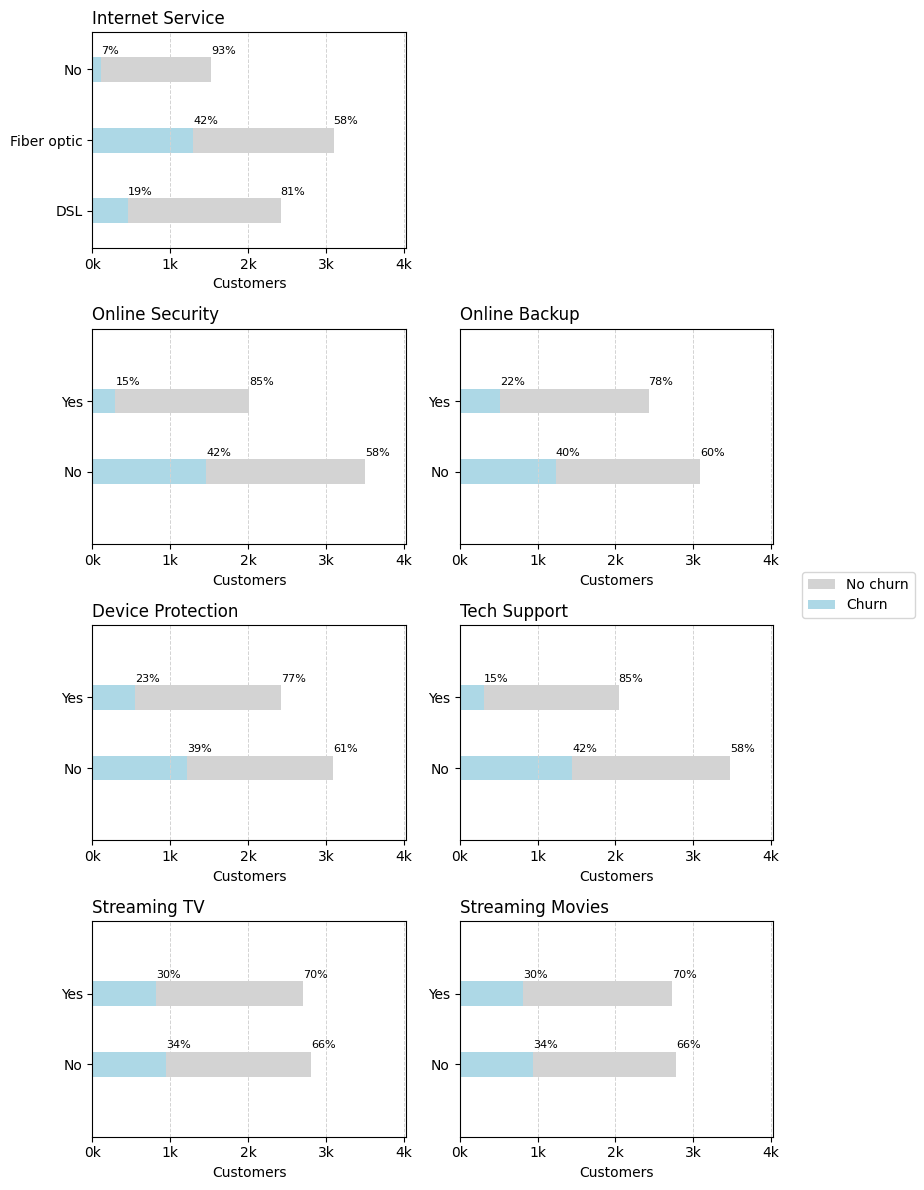

In [515]:
dfs = generate_grouped_data(['Internet_Service', 'Online_Security', 'Online_Backup',
                          'Device_Protection', 'Tech_Support', 'Streaming_TV',
                          'Streaming_Movies'],
                           drop='No internet service', )
fig, ax = subplots_horizontal(dfs, skip=[1], bar_height=0.35)
plt.show()

In [516]:
df_correlation = df.copy()
df_correlation.head()

,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,False,Female,False,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [517]:
numeric_cols = df_correlation.select_dtypes(include=['number'])
#correlation_with_churn = numeric_cols.corr()['Churn'].sort_values(ascending=False)
#correlation_with_churn

##📄Relatorio Final